In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [102]:
#Initial Updates
service_app = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/service_app.csv')
income_data = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/IRSIncomeByZipCode.csv')
repair_data = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/repairs.csv')
project_data = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/project_cost.csv')

income_data.rename(columns={'ZIPCODE': 'Zip'}, inplace=True)

service_app.rename(columns={'Id': 'ID'}, inplace=True)
repair_data.rename(columns={'Service_Application': 'ID'}, inplace=True)
project_data.rename(columns={'Service_Application': 'ID'}, inplace=True)

#service_income = pd.merge(service_app, income_data, on='Zip', how='left')
service_repair = pd.merge(service_app, repair_data, on='ID', how='inner')

service_project_repair = pd.merge(service_repair, project_data, on='ID', how='inner')

#Making difference between starting and end score
service_project_repair['Housing_Score_Difference'] = service_project_repair['Post_Healthy_Housing_Score'] - service_project_repair['Pre_Healthy_Housing_Score']

In [106]:
service_project_repair.columns

Index(['ID', 'RecordType', 'CreatedDate_x', 'Account', 'Area_Median_Income',
       'County2', 'Current_Program_Operating_Budget_Amount',
       'Date_of_Application', 'Date_of_Closure', 'Drivers_Licence_ID',
       'Female_Head_of_Household', 'Insurance', 'Lead_Test',
       'Monthly_Mortgage_Payment', 'Monthly_Utility_Bills', 'Mortgage_Current',
       'Mortgage', 'Most_Recent_Completed_Project_Date', 'Move_in_Year',
       'Number_of_Projects_Closed', 'Number_of_Projects_in_Progress',
       'Program_Eligibility2', 'Proof_of_Annual_Income', 'Proof_of_Ownership',
       'Property_Taxes_Current', 'Reason', 'Renovate_Right_Form',
       'Service_Area', 'Status_x', 'Type_of_House', 'Year_Built',
       'Child_Residents', 'Disabled_Residents', 'Elderly_Residents2',
       'Female_Residents', 'Male_Residents', 'Post_Healthy_Housing_Score',
       'Pre_Healthy_Housing_Score', 'Residents', 'Total_Changes_Made',
       'Total_Household_Annual_Income', 'Veteran_Residents', 'Severity_Scope',
 

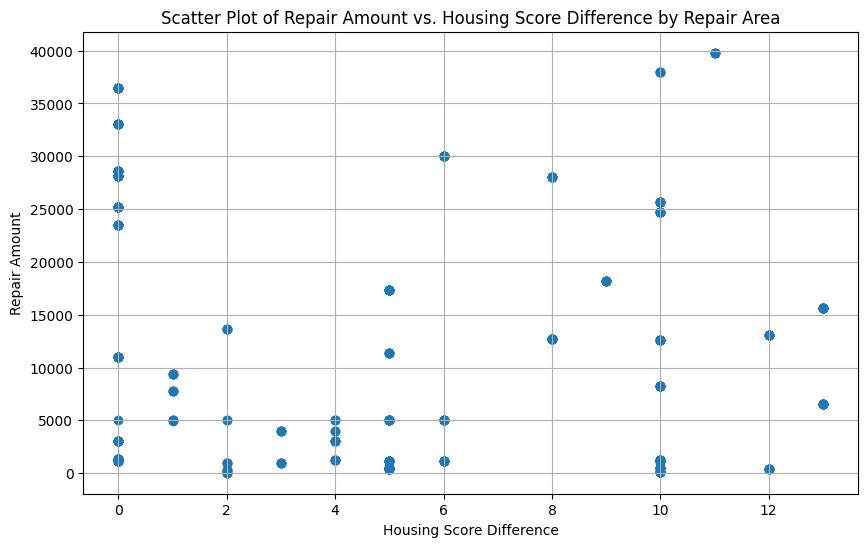

In [112]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(service_project_repair['Housing_Score_Difference'], service_project_repair['Amount'])
plt.xlabel('Housing Score Difference')
plt.ylabel('Repair Amount')
plt.title('Scatter Plot of Repair Amount vs. Housing Score Difference by Repair Area')
plt.grid(True)
plt.show()

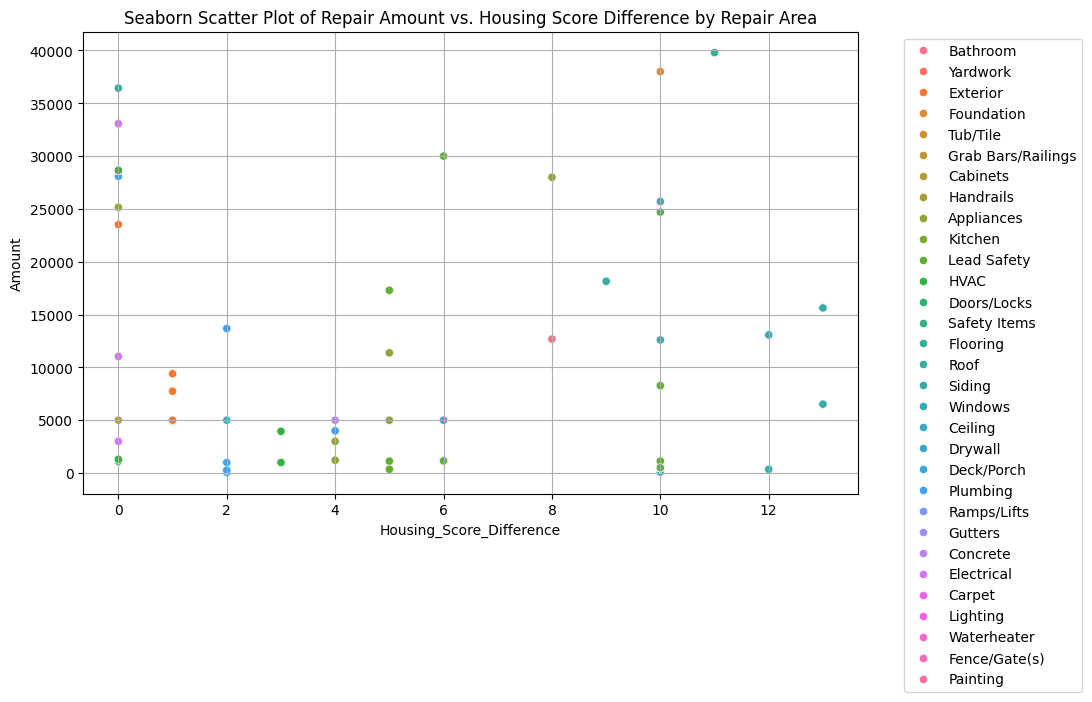

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=service_project_repair, x='Housing_Score_Difference', y='Amount', hue='Repair_Area')
plt.title('Seaborn Scatter Plot of Repair Amount vs. Housing Score Difference by Repair Area')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [140]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(service_project_repair,
                 x='Housing_Score_Difference',
                 y='Amount',
                 color='Repair_Area',
                 hover_name='Repair_Area', # Show Repair_Area on hover
                 text='ID', # Add ID as text label
                 title='Interactive Scatter Plot of Repair Amount vs. Housing Score Difference by Repair Area with ID Labels')

# Improve text label appearance (optional)
fig.update_traces(textposition='top center')

# Display the plot
fig.show()

In [121]:
# Filter the DataFrame
filtered_df = service_project_repair[(service_project_repair['Amount'] < 20000) & (service_project_repair['Housing_Score_Difference'] > 6)].copy()

# Create an interactive scatter plot for the filtered data
fig_filtered = px.scatter(filtered_df,
                          x='Housing_Score_Difference',
                          y='Amount',
                          color='Repair_Area',
                          hover_name='Repair_Area', # Show Repair_Area on hover
                          title='Interactive Scatter Plot of Repair Amount vs. Housing Score Difference (Amount < $15K and Difference > 6)')

# Display the plot
fig_filtered.show()

In [148]:
# Define the desired order for Severity_Scope
severity_order = ['High', 'Medium', 'Light']

# Filter the DataFrame to include only the desired severity levels and create a copy
filtered_severity_df = service_project_repair[service_project_repair['Severity_Scope'].isin(severity_order)].copy()

# Convert 'Severity_Scope' to a categorical type with the specified order
filtered_severity_df.loc[:, 'Severity_Scope'] = pd.Categorical(filtered_severity_df['Severity_Scope'], categories=severity_order, ordered=True)

# Create an interactive scatter plot
fig = px.scatter(filtered_severity_df,
                 x='Amount',
                 y='Severity_Scope',
                 color='Repair_Area',
                 hover_name='Repair_Area', # Show Repair_Area on hover
                 title='Repair Amount vs. Severity of Repair by Repair Area (Ordered by Severity)')

# Display the plot
fig.show()

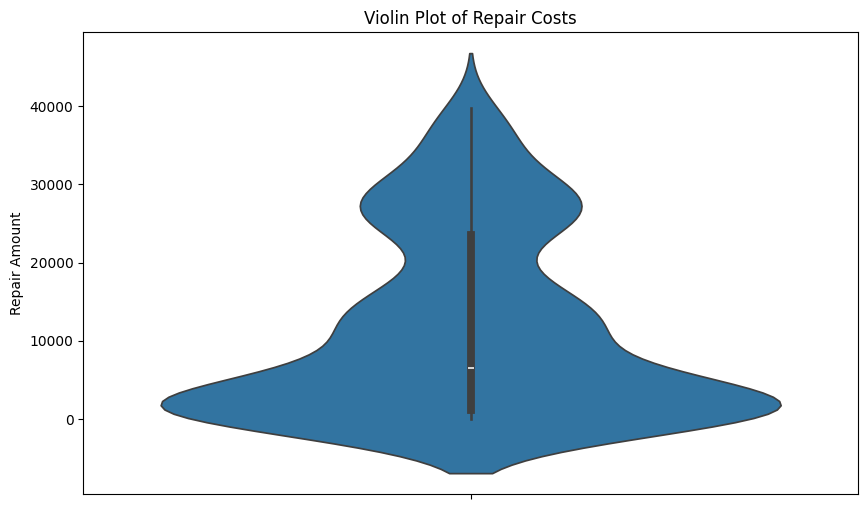

In [135]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=service_project_repair['Amount'])
plt.title('Violin Plot of Repair Costs')
plt.ylabel('Repair Amount')
plt.show()

In [60]:
#Total served
sum(service_income['Female_Residents'] + service_income['Male_Residents'])

498

In [56]:
sum(service_income['Child_Residents'])

47

In [57]:
sum(service_income['Elderly_Residents2'])

254

In [58]:
sum(service_income['Disabled_Residents'])

96

In [62]:
96 + 254 + 47
#Vulernable Population

397

In [63]:
#Population served that is classified as vulernable
397/498

0.7971887550200804

In [138]:
service_project_repair['Repair_Area'].value_counts()

,count
Repair_Area,
Bathroom,53
Doors/Locks,45
Kitchen,33
Flooring,31
Appliances,30
Plumbing,26
Exterior,21
Lead Safety,19
Electrical,17


In [157]:
test = service_project_repair[service_project_repair['ID'] == 'service_app_197']
# The line below was causing an error because 'columns' is an attribute, not a method
test.columns

Index(['ID', 'RecordType', 'CreatedDate_x', 'Account', 'Area_Median_Income',
       'County2', 'Current_Program_Operating_Budget_Amount',
       'Date_of_Application', 'Date_of_Closure', 'Drivers_Licence_ID',
       'Female_Head_of_Household', 'Insurance', 'Lead_Test',
       'Monthly_Mortgage_Payment', 'Monthly_Utility_Bills', 'Mortgage_Current',
       'Mortgage', 'Most_Recent_Completed_Project_Date', 'Move_in_Year',
       'Number_of_Projects_Closed', 'Number_of_Projects_in_Progress',
       'Program_Eligibility2', 'Proof_of_Annual_Income', 'Proof_of_Ownership',
       'Property_Taxes_Current', 'Reason', 'Renovate_Right_Form',
       'Service_Area', 'Status_x', 'Type_of_House', 'Year_Built',
       'Child_Residents', 'Disabled_Residents', 'Elderly_Residents2',
       'Female_Residents', 'Male_Residents', 'Post_Healthy_Housing_Score',
       'Pre_Healthy_Housing_Score', 'Residents', 'Total_Changes_Made',
       'Total_Household_Annual_Income', 'Veteran_Residents', 'Severity_Scope',
 

In [160]:
# Print specific columns from the test DataFrame
# Replace with the actual column names you want to display
columns_to_print = ['Repair_Area', 'Amount', 'Pre_Healthy_Housing_Score', 'Post_Healthy_Housing_Score', 'Housing_Score_Difference']
print(test[columns_to_print])

    Repair_Area   Amount  Pre_Healthy_Housing_Score  \
0      Bathroom  38000.0                         13   
1      Yardwork  38000.0                         13   
2      Exterior  38000.0                         13   
3    Foundation  38000.0                         13   
4      Tub/Tile   5000.0                         19   
..          ...      ...                        ...   
417        HVAC  28650.0                         16   
418        HVAC   1117.0                         16   
419        HVAC   1302.0                         16   
420    Flooring   4000.0                         21   
421    Plumbing   4000.0                         21   

     Post_Healthy_Housing_Score  Housing_Score_Difference  
0                            23                        10  
1                            23                        10  
2                            23                        10  
3                            23                        10  
4                            24        